## 🕸️ What is Web Scraping and Web Mining?

### 🧽 **Web Scraping**

Think of it like using a sponge to collect water — except here, we collect **data from websites**.

Example:
You visit a website like IMDb and **copy the movie names, ratings, and reviews**. A web scraper does this automatically using code.

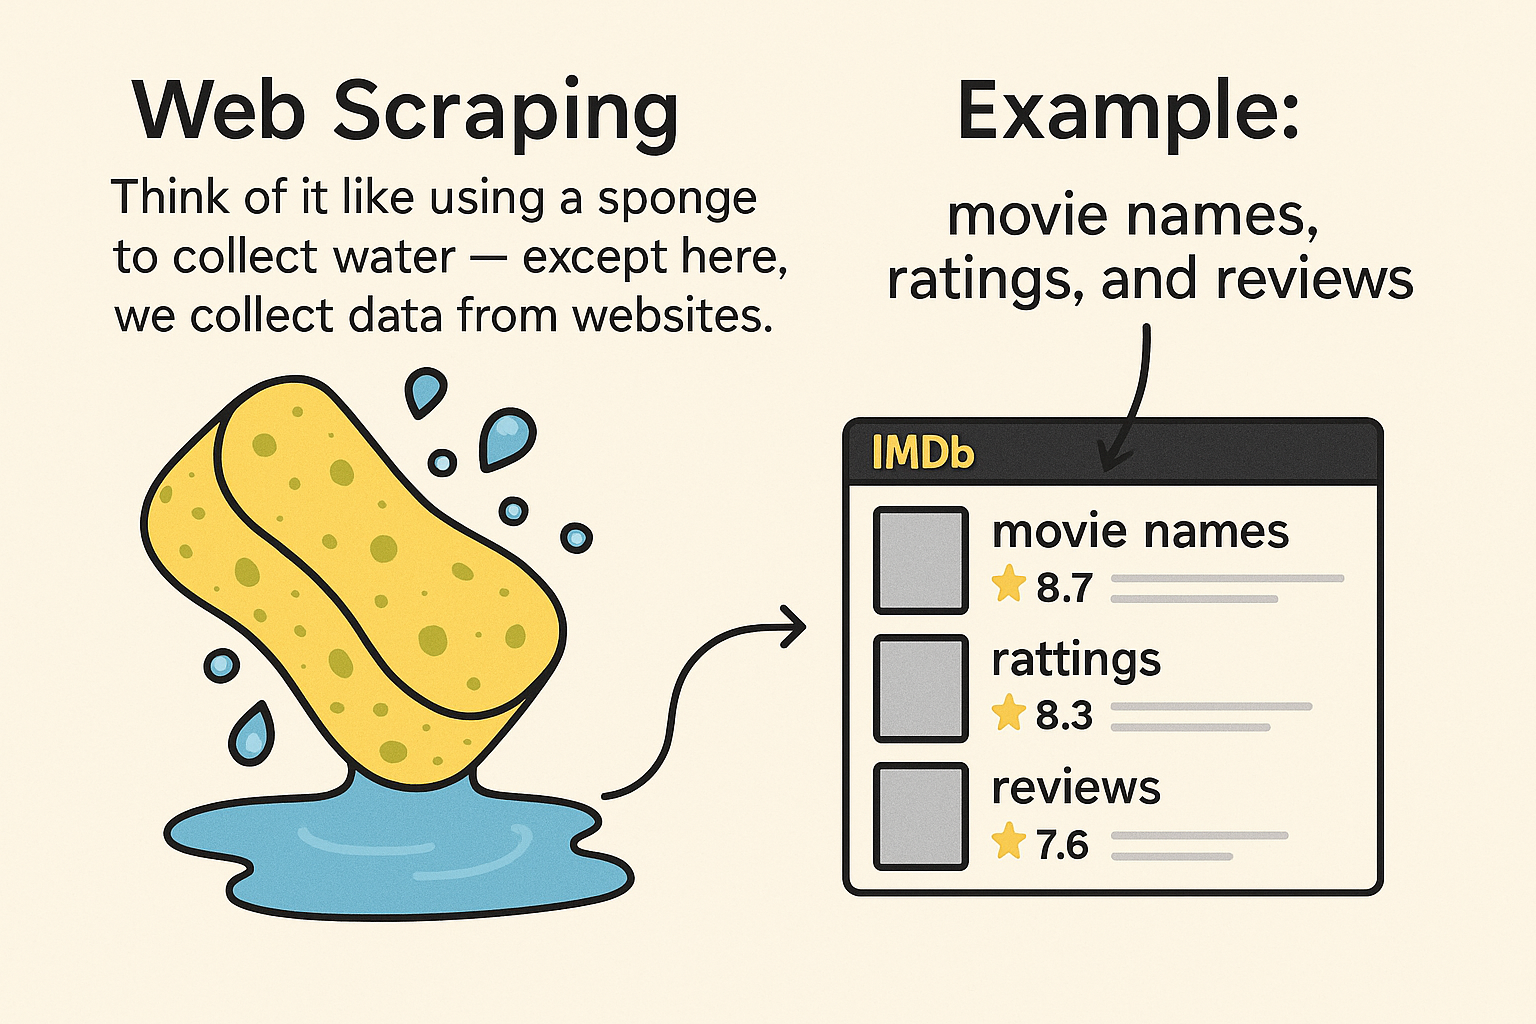


---

### 🧠 **Web Mining**

This goes a step further. After collecting data, **you analyze it** to find patterns, trends, or insights.

Example:
From those IMDb reviews, you find out which movie genre is the most liked in 2024.

---


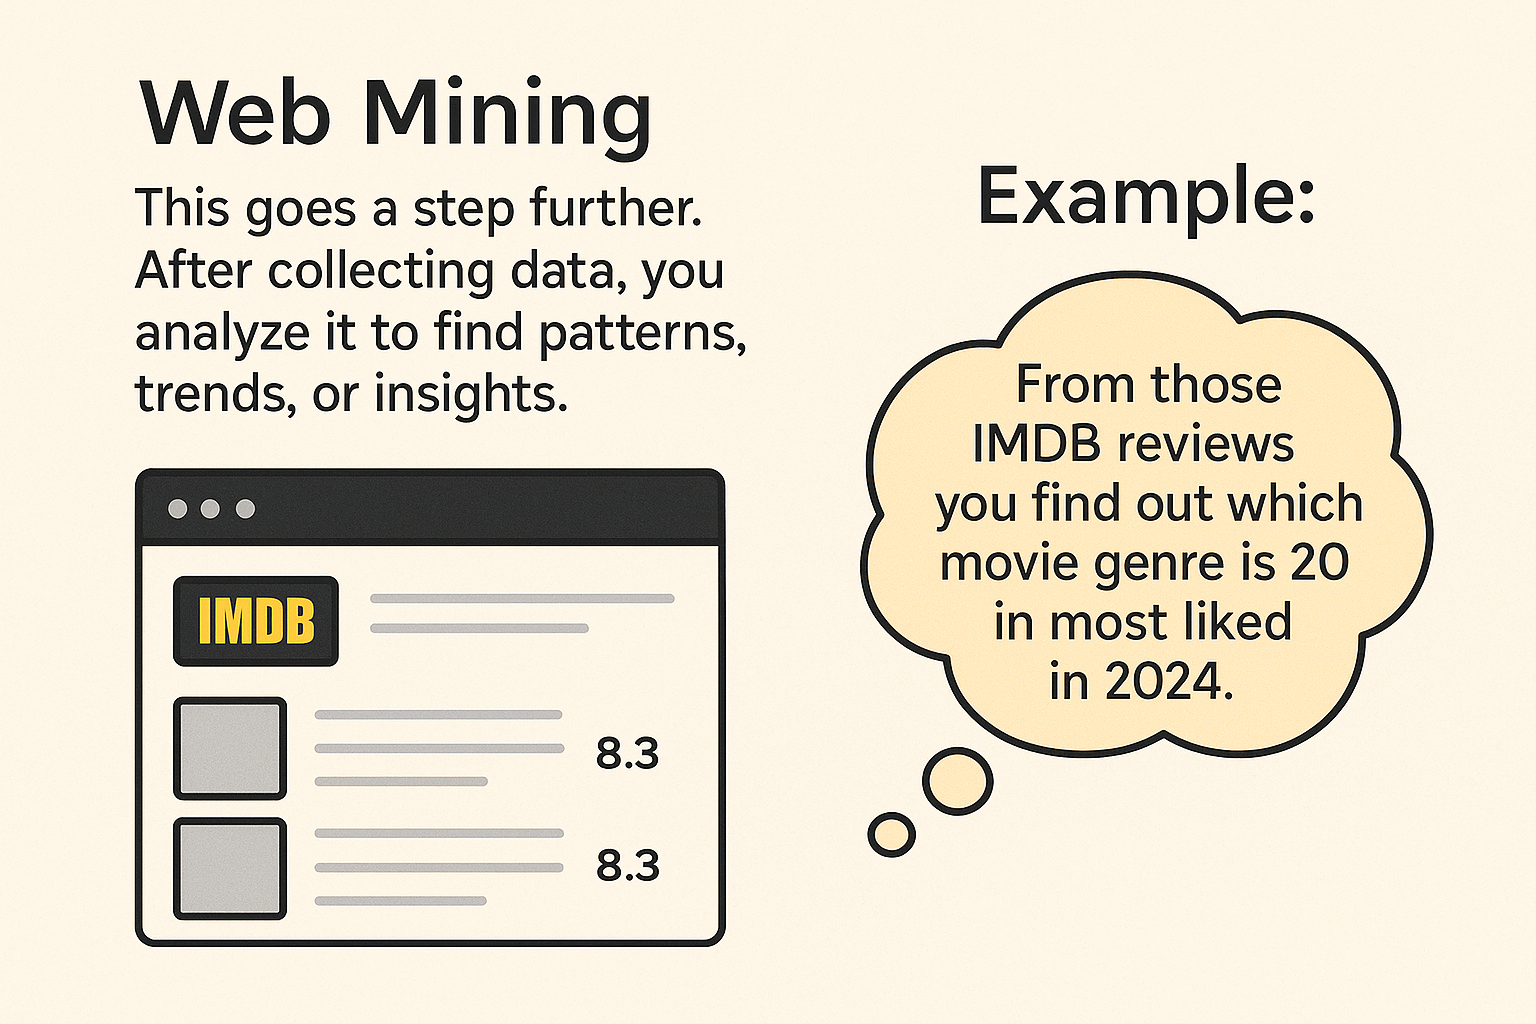

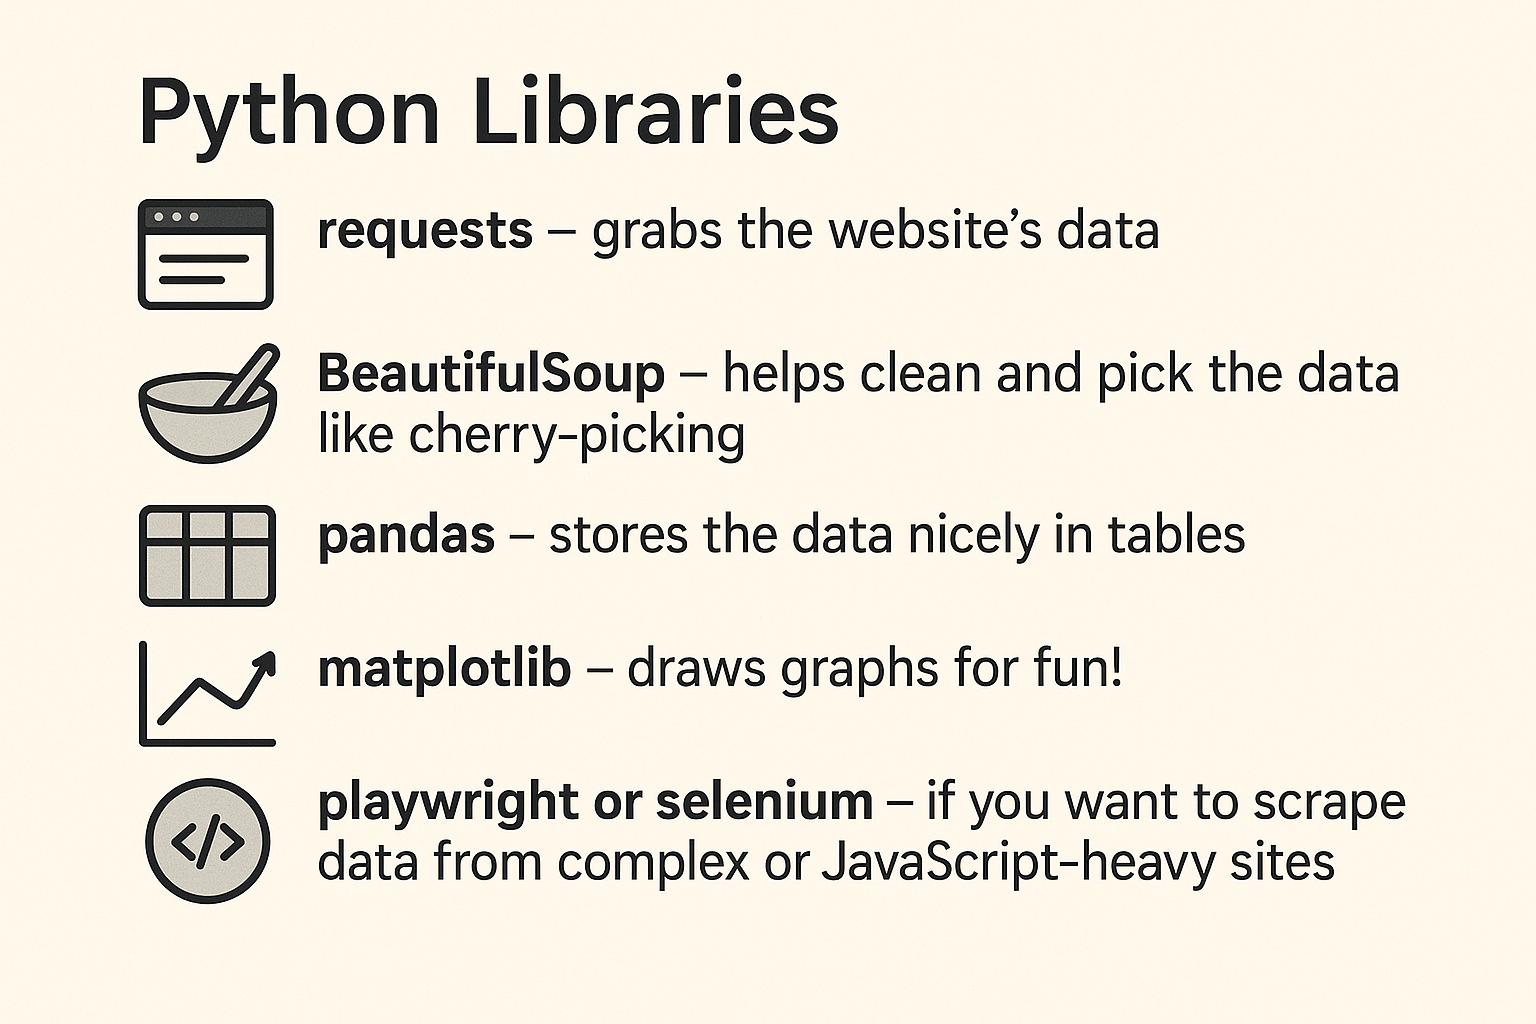

In [ ]:
!pip install requests pandas matplotlib


#🪄 Import Python Libraries

In [ ]:
import requests
import pandas as pd
from IPython.display import display, HTML

#🌐 2. Get Country Info from REST Countries API

In [5]:
def get_country_info(country_name):
    # Create the API URL using the country name
    url = f"https://restcountries.com/v3.1/name/{country_name}"

    # Send a GET request to the API
    response = requests.get(url)

    # If the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()[0]  # Get the first country match from the response

        # Return a dictionary with selected country info
        return {
            'Country': data['name']['common'],  # Country name
            'Capital': data.get('capital', ['N/A'])[0],  # Capital city or 'N/A' if missing
            'Population': data['population'],  # Total population
            'Currency': list(data['currencies'].keys())[0],  # First currency code
            'Flag': data['flags']['png']  # URL of the flag image
        }
    else:
        # If the request failed, return None
        return None


#🐱 3. Add a Cat Fact (because fun)

In [4]:
def get_cat_fact():
    # API URL to get a random cat fact
    url = "https://catfact.ninja/fact"

    # Send a GET request to the API
    response = requests.get(url)

    # If request is successful, return the cat fact
    # Otherwise, return a default message
    return response.json()['fact'] if response.status_code == 200 else "Cats are cute!"


#👦 4. Make It User-Friendly

In [6]:
country = input("Enter a country name: ")

info = get_country_info(country)
cat_fact = get_cat_fact()

if info:
    df = pd.DataFrame([info])
    display(df)
    display(HTML(f"<img src='{info['Flag']}' width='150'>"))
    print("\n🐱 Random Cat Fact:", cat_fact)
else:
    print("Sorry! Country not found. Try again.")


Enter a country name: india


Country    Capital  Population Currency                             Flag
0   India  New Delhi  1380004385      INR  https://flagcdn.com/w320/in.png


🐱 Random Cat Fact: Cats do not think that they are little people. They think that we are big cats. This influences their behavior in many ways.
